## Setup

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Question 1

In [5]:
img = cv.imread("low_contrast_img.jfif",0)

eq_1st = cv.equalizeHist(img)
eq_2nd = cv.equalizeHist(eq_1st)

cv.imshow("Equalization 1st & 2nd", np.hstack((eq_1st,eq_2nd)))
cv.waitKey()
cv.destroyAllWindows()

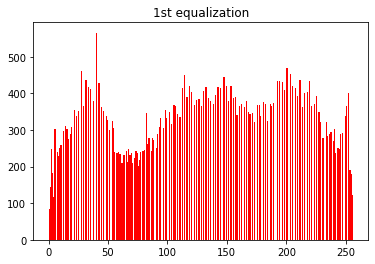

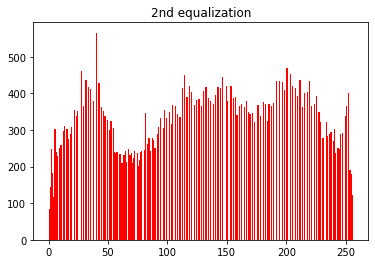

'\nBased on the images show and graps plotted, there are no diffeernce between them \n'

In [6]:
plt.title("1st equalization")

plt.show(plt.hist(eq_1st.ravel(), 256, [0,256], color = 'r'))
plt.title("2nd equalization")
plt.show(plt.hist(eq_2nd.ravel(), 256, [0,256], color = 'r'))

"""
Based on the images show and graps plotted, there are no diffeernce between them 
"""

## Question 2

- A. Different Kernel Size = 3
- B. Edge detection using Sobel operator
- C. Laplacian of Gaussian

###  Kernel Size

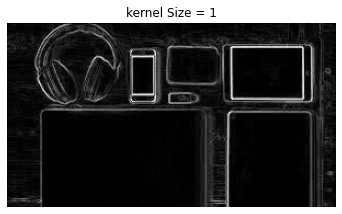

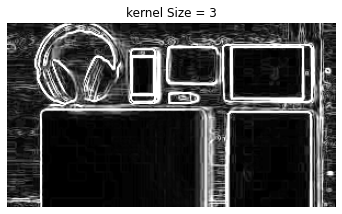

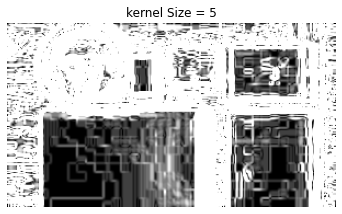

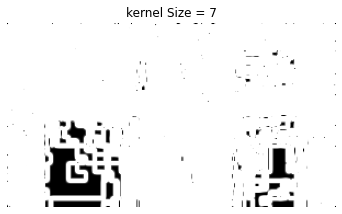

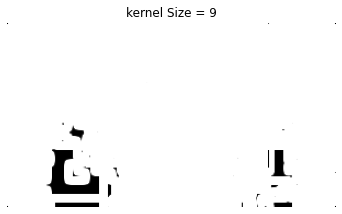

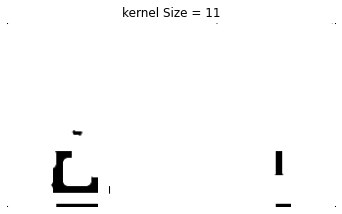

'\nThe edge with kernel size with 3 is more obvious than other \n'

In [7]:
img = cv.imread("electronic.jfif",0)

img_list = []
title = ["kernel Size = 1" ,"kernel Size = 3","kernel Size = 5",
         "kernel Size = 7", "kernel Size = 9", "kernel Size = 11"]
for i in range(1, 12,2):
    sobel_x = cv.Sobel(img, cv.CV_64F,1,0, ksize = i)
    sobel_y = cv.Sobel(img, cv.CV_64F,0,1, ksize = i)
    grad = cv.magnitude(sobel_x, sobel_y)
    grad = cv.convertScaleAbs(grad)
    img_list.append(grad)
    
for i in range(6):
    plt.figure(figsize=(20, 20))
    plt.subplot(2,3,i+1), plt.imshow(img_list[i], 'gray')
    plt.title(title[i])
    plt.axis('off')
plt.show()
"""
The edge with kernel size with 3 is more obvious than other 
"""


### Edge detection with and without Gaussian bluring 

(-0.5, 299.5, 167.5, -0.5)

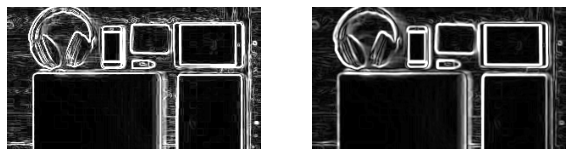

In [8]:
# without Gaussian Blur
sobel_x = cv.Sobel(img, cv.CV_64F,1,0, ksize = 3)
sobel_y = cv.Sobel(img, cv.CV_64F,0,1, ksize = 3)
grad = cv.magnitude(sobel_x, sobel_y)
grad = cv.convertScaleAbs(grad)

# with Gaussian Blur
blur = cv.GaussianBlur(img, (5,5), 0)
sobel_x_blur = cv.Sobel(blur, cv.CV_64F,1,0, ksize = 3)
sobel_y_blur = cv.Sobel(blur, cv.CV_64F,0,1, ksize = 3)
grad_blur = cv.magnitude(sobel_x_blur, sobel_y_blur)
grad_blur = cv.convertScaleAbs(grad_blur)



plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(grad, 'gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(grad_blur, 'gray')
plt.axis("off")

### Laplacian of Gaussian

(-0.5, 299.5, 167.5, -0.5)

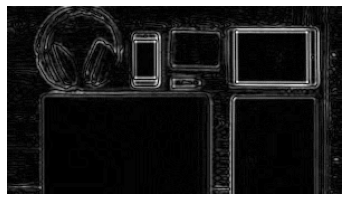

In [9]:
laplacian = cv.Laplacian(blur, cv.CV_64F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)

plt.imshow(laplacian_8u, "gray")
plt.axis("off")

#### B) Sobel operator with Gaussian Blur is the optimal patway since the edge is the clearest and with less noices compare with other 

## Question 3

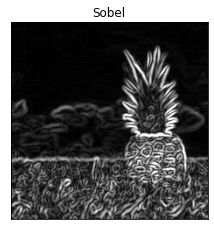

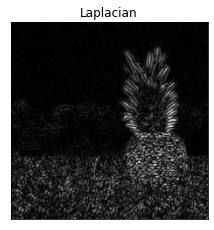

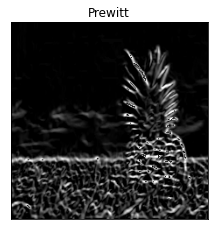

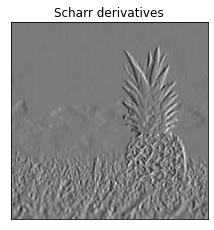

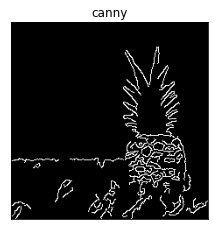

In [10]:
img = cv.imread("pineapple.jfif",0)
img_blur = cv.GaussianBlur(img, (5,5), 0)

kernelx = np.array([[1,3,1],[0,0,0],[-1,-3,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

# Sobel
sobel_x = cv.Sobel(img_blur, cv.CV_64F,1,0, ksize = 3)
sobel_y = cv.Sobel(img_blur, cv.CV_64F,0,1, ksize = 3)
grad = cv.magnitude(sobel_x, sobel_y)
grad = cv.convertScaleAbs(grad)

#Laplacian 
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)

# Prewitt
prewittx = cv.filter2D(img_blur,-1, kernelx)
prewitty = cv.filter2D(img_blur, -1, kernely)
prewitt = prewittx + prewitty

# Scharr derivatives
scharr = cv.Scharr(img, cv.CV_64F, 1,0, borderType = cv.BORDER_DEFAULT)

# Canny
dst = cv.Canny(img_blur, 100, 255, apertureSize = 3)

img_list = [grad, laplacian_8u, prewitt, scharr,dst]
title = ['Sobel', 'Laplacian','Prewitt','Scharr derivatives','canny']

for i in range(len(img_list)):
    plt.figure(figsize=(12,12))
    plt.subplot(2, 3, i+1)
    plt.imshow(img_list[i], 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])
plt.show()

#### Sobel have flurry lines edge detection with some noises
#### Laplacian also have flurry line edge detection but without noises
#### Prewitt 
#### Scharr derivatives 
#### Canny has a only line edge detection

## Question 4 

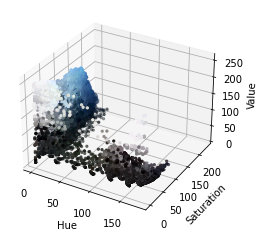

In [30]:
from matplotlib.colors import hsv_to_rgb
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

img = cv.imread('electronic.jfif')
img_copy = img.copy()
img_RGB = cv.cvtColor(img_copy, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_RGB, cv.COLOR_RGB2HSV)

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")

axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

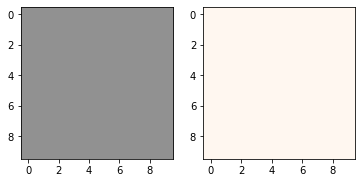

In [31]:
white_low = (0,0,145)
white_high = (20,15,255)
lo_square = np.full((10, 10, 3), white_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), white_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

In [32]:
mask = cv.inRange(img_hsv, white_low, white_high)
res = cv.bitwise_and(img,img, mask = mask)
res = cv.cvtColor(res, cv.COLOR_HSV2BGR)
res = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
contours, hierarchy = cv.findContours(res, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw contours
cv.drawContours(img,contours, -1, (0,255,0), 2 , cv.LINE_AA)

cv.imshow('contour', img)
cv.waitKey()
cv.destroyAllWindows()